## Polyptich: easier layouting in matplotlib

In [1]:
import polyptich as pp

In [2]:
pp.setup_ipython()

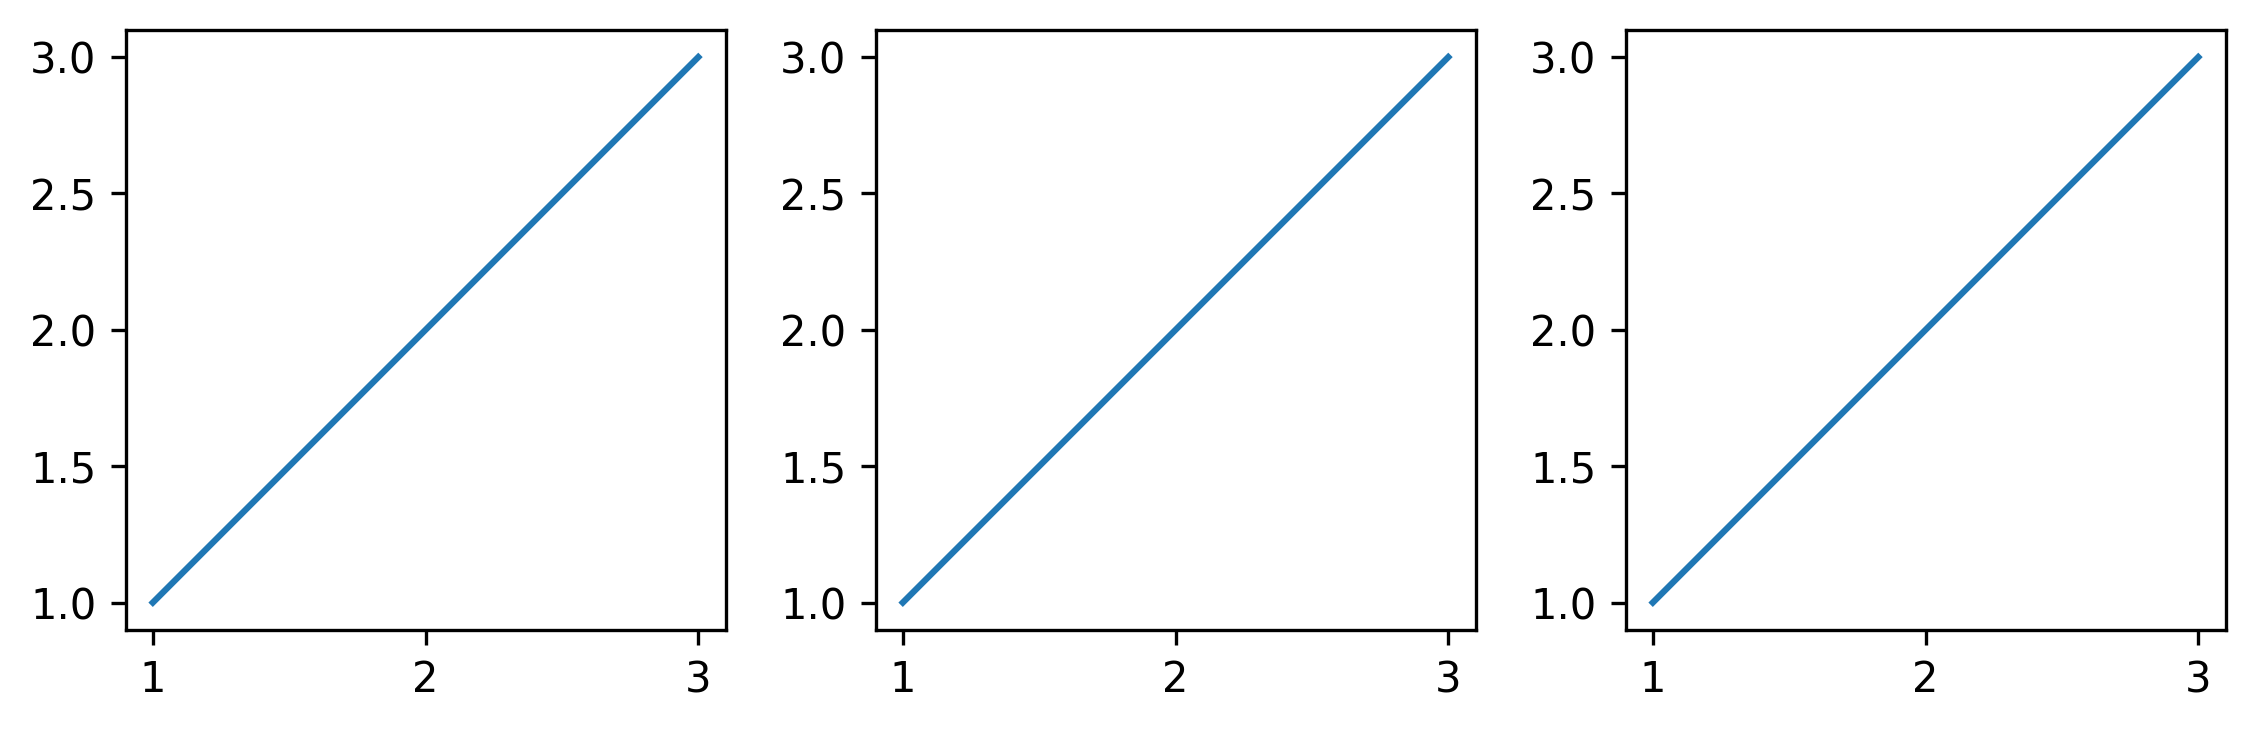

In [3]:
fig = pp.Figure()
ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)

ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)

ax = pp.Panel((2, 2))
ax.plot([1, 2, 3], [1, 2, 3])
fig.main.add_right(ax)
fig.display()

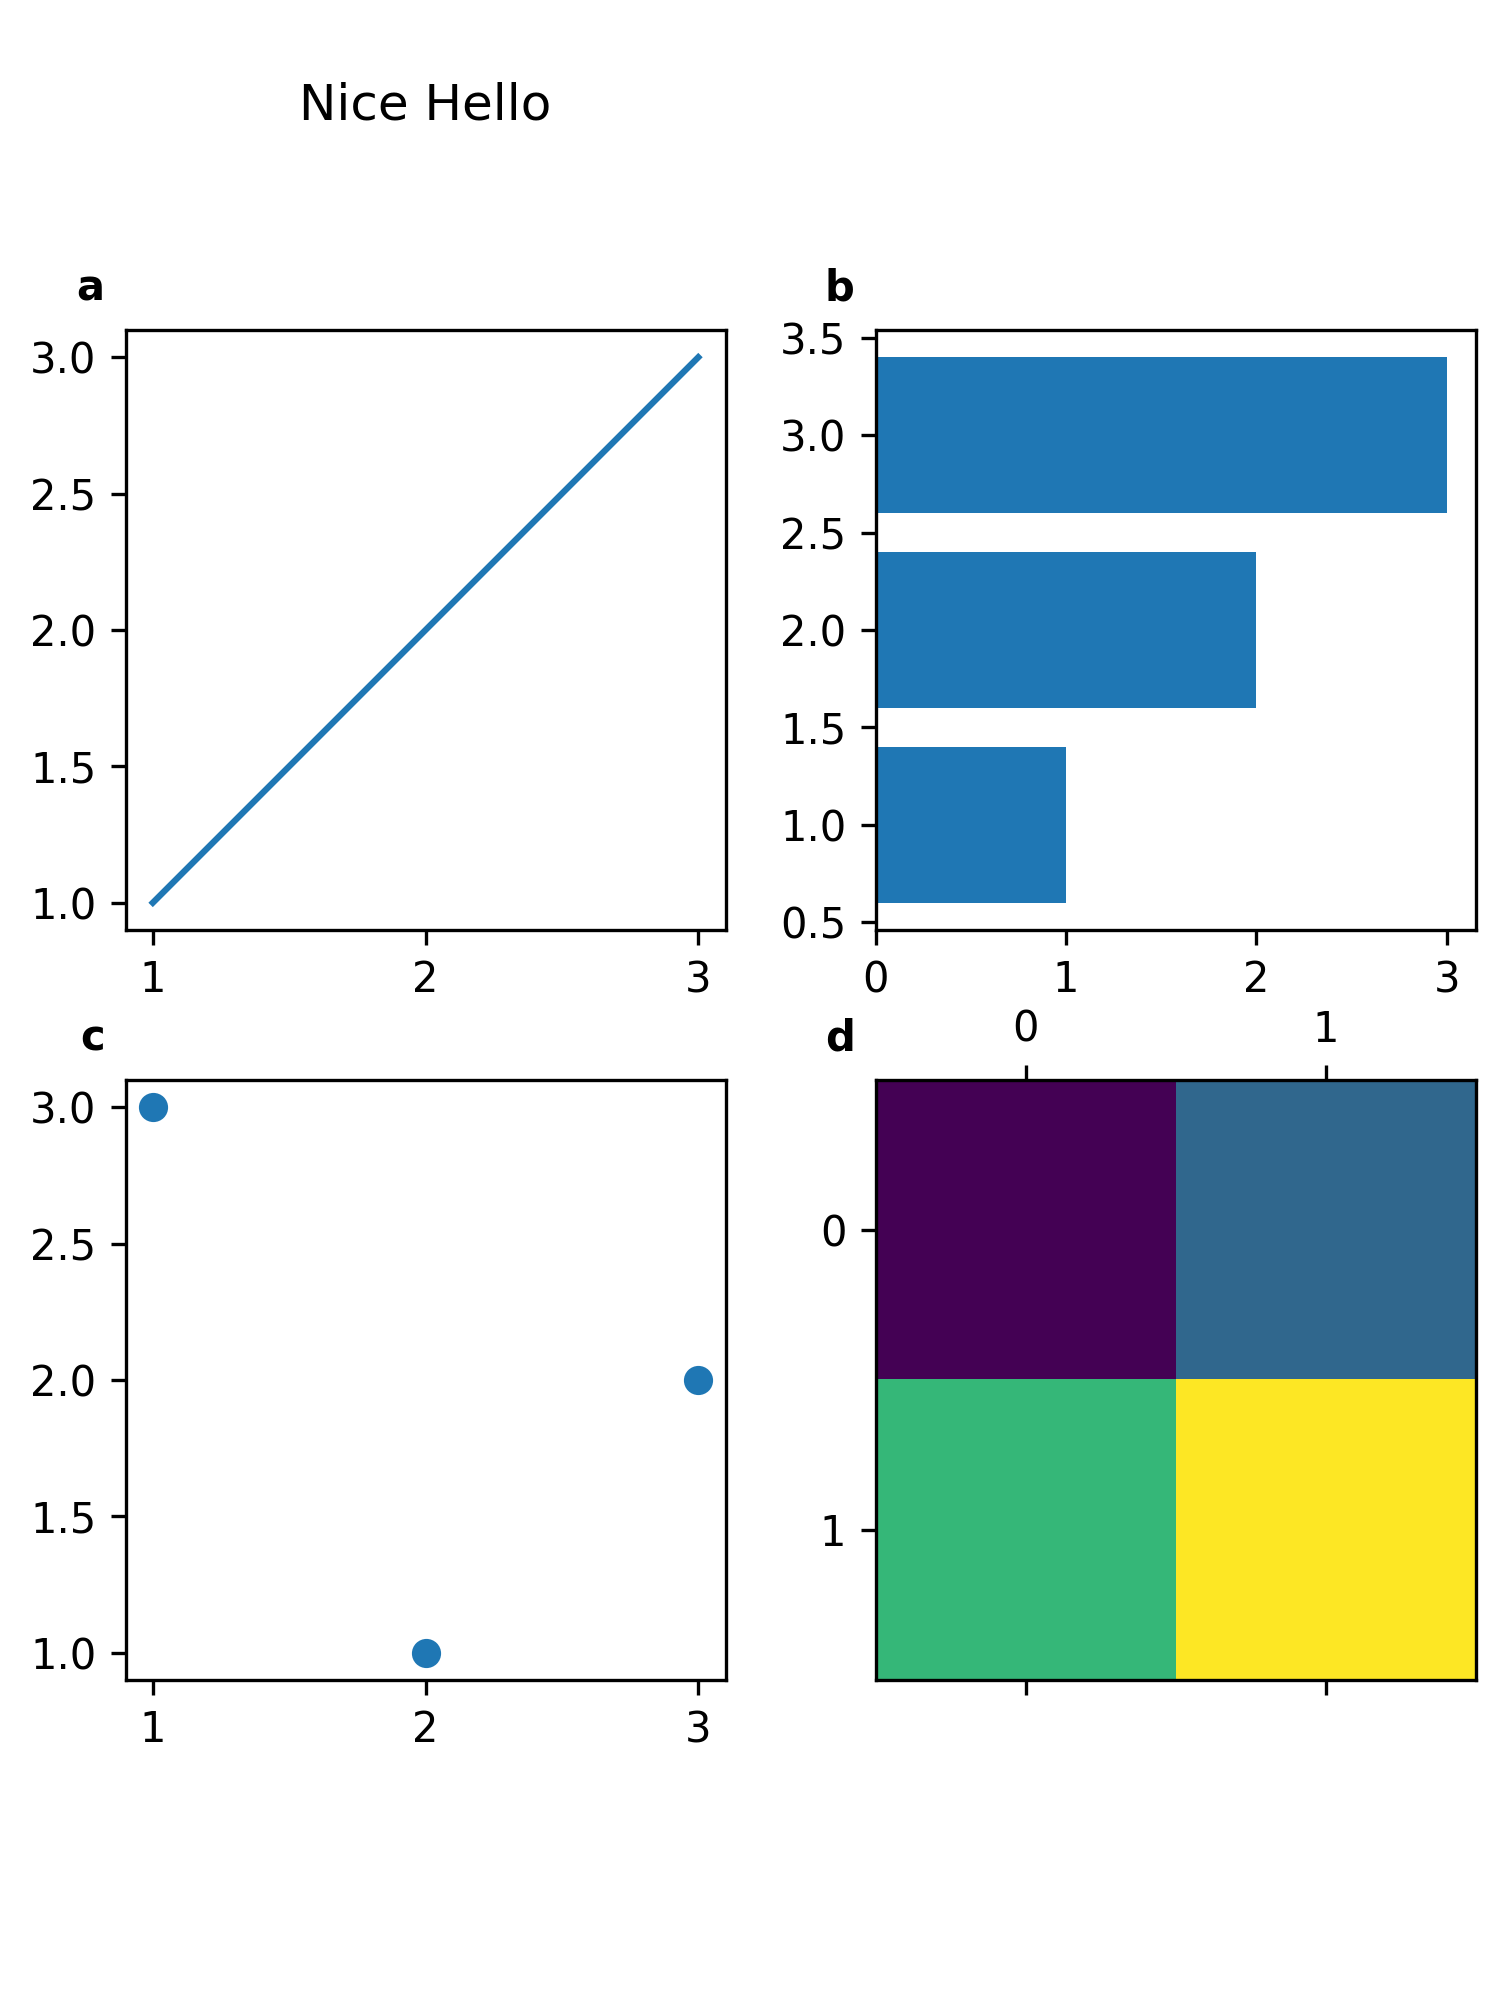

In [4]:
fig = pp.Figure()
ax1 = pp.Panel((2, 2))
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.add_tag("a")

ax2 = pp.Panel((2, 2))
ax2.barh([1, 2, 3], [1, 2, 3])
ax2.add_tag("b")

ax3 = pp.Panel((2, 2))
ax3.scatter([1, 2, 3], [3, 1, 2])
ax3.add_tag("c")

ax4 = pp.Panel((2, 2))
ax4.matshow([[1, 2], [3, 4]])
ax4.add_tag("d")

title = pp.Title("Nice Hello")
legend = pp.Panel((None, 0.5))
legend.axis("off")

fig.main = title / (ax1 | ax2) / (ax3 | ax4) / legend
fig.display()